<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/Cardiotocographic.csv')

# Display the first few rows
display(df.head())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [9]:
# Check data types
display(df.info())

# Get a summary of the dataset
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


None

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [11]:
# Check for missing values
display(df.isnull().sum())

# Handle missing values (Example: fill with median for numerical columns)
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

# Verify missing values are handled
display(df.isnull().sum())

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [12]:
# Detect and treat outliers using IQR
for column in df.columns:
    if df[column].dtype in ['float64', 'int64']:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap or floor outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

display(df.describe())

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0,2126.0,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.0
mean,133.290331,0.003132,0.001568,0.004362,0.001770,0.0,0.0,46.981873,1.304644,6.691678,8.007471,70.287203,0.316537,1.0
std,9.930268,0.003828,0.002485,0.003001,0.002668,0.0,0.0,17.612745,0.781091,10.378400,5.047078,39.571995,0.622406,0.0
min,105.000000,-0.008409,-0.003850,-0.005177,-0.004934,0.0,0.0,-11.500000,-0.800000,-16.500000,-4.700000,-57.500000,-1.500000,1.0
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.0,0.0,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.0
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.0
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.0,0.0,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.0
max,161.000000,0.014015,0.006416,0.013564,0.008224,0.0,0.0,104.500000,3.200000,27.500000,20.100000,194.500000,2.500000,1.0


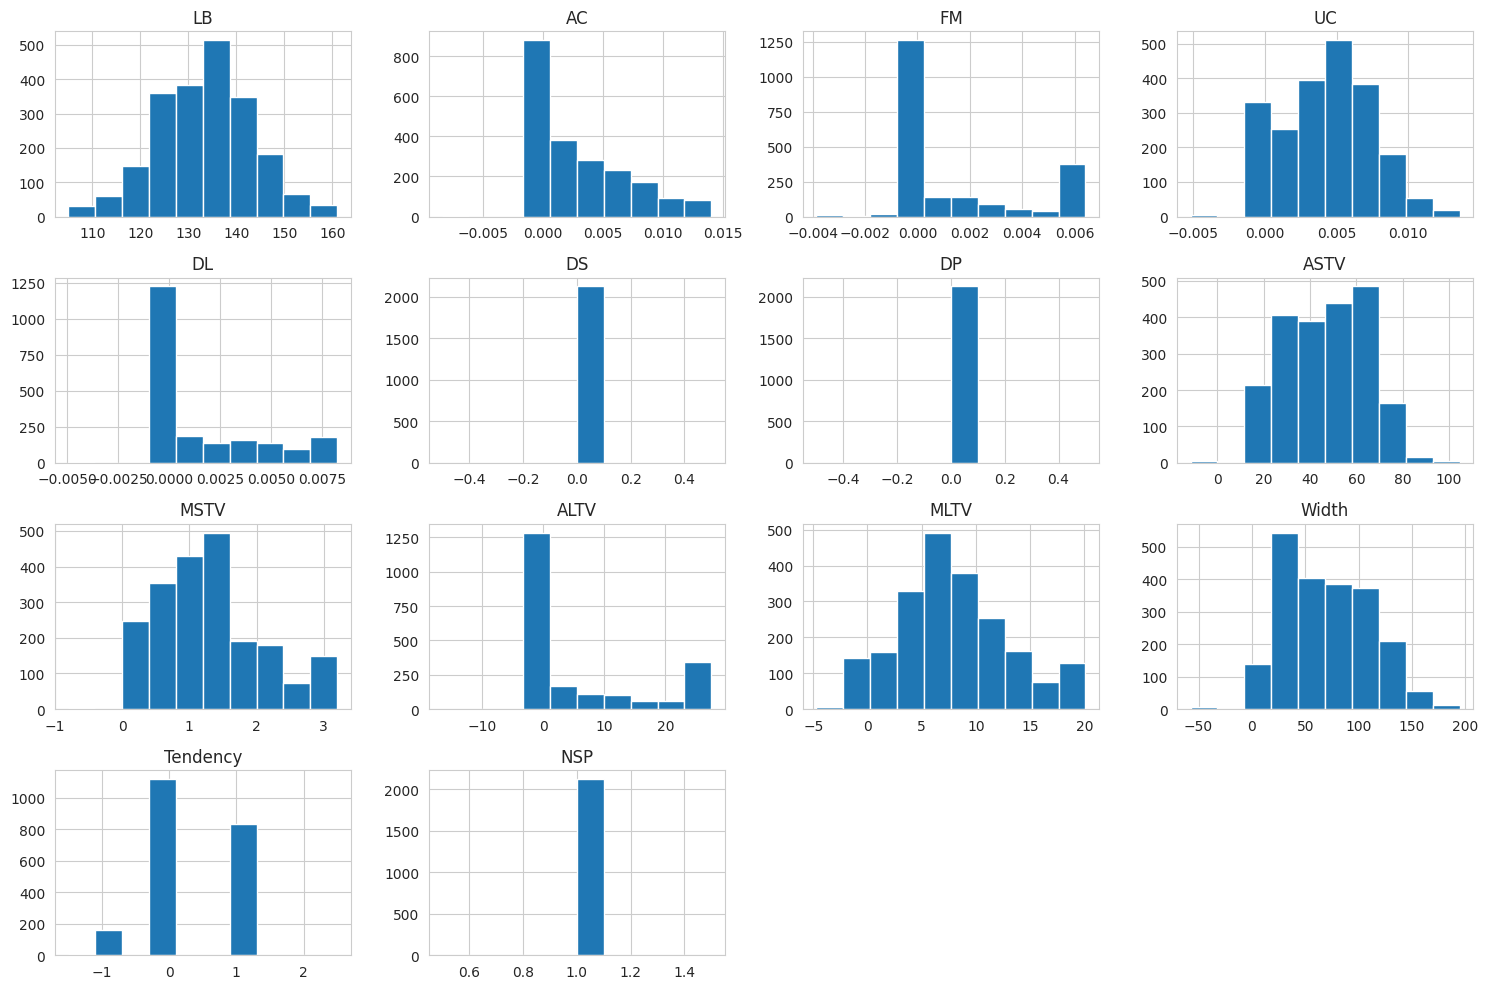

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Create histograms for numerical variables
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

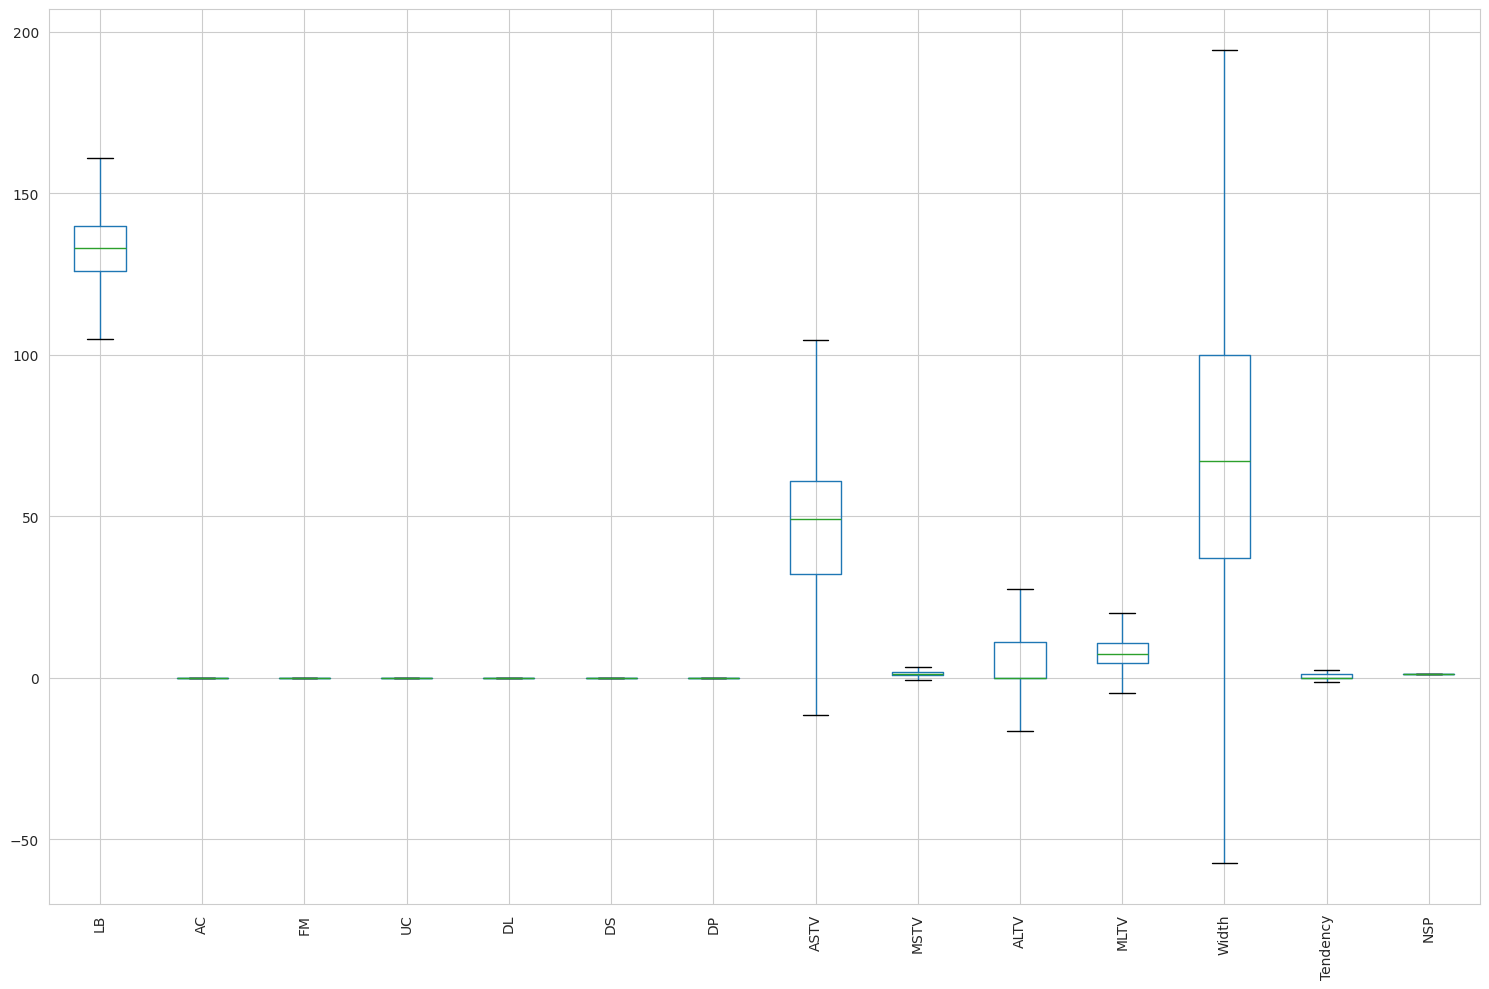

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create boxplots for numerical variables
plt.figure(figsize=(15, 10))
df.boxplot()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()